In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
df_can = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
print(df_can.shape)

(195, 43)


In [6]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [7]:
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [8]:
df_can.columns = list(map(str, df_can.columns))

In [9]:
df_can.set_index('Country', inplace=True)

In [10]:
df_can['Total'] = df_can.sum (axis =1)

In [11]:
years = list(map(str,range(1980,2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.3.2


In [13]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'],:]

In [14]:
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [15]:
!conda install -c conda-forge wordcloud --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.10.1-py38haa95532_1 --> conda-forge::conda-4.10.1-py38haa244fe_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [16]:
alice_novel = open('alice_novel.txt', 'r').read()

In [17]:
from wordcloud import WordCloud, STOPWORDS

In [18]:
stopwords = set(STOPWORDS)

In [19]:
alice_wc = WordCloud(
    background_color='white',
    max_words = 2000,
    stopwords=stopwords
)

In [20]:
alice_wc.generate(alice_novel)

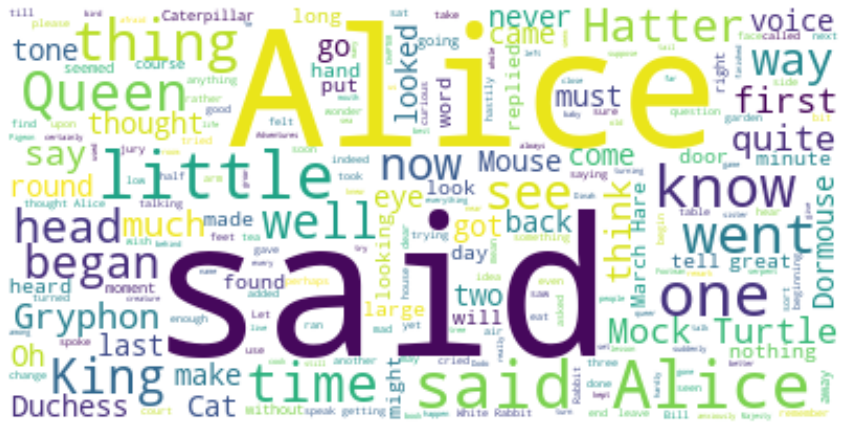

In [21]:
plt.figure(figsize=(15,10))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
stopwords.add('said')
stopwords.add('went')
stopwords.add('one')
stopwords.add('little')

In [23]:
alice_wc.generate(alice_novel)

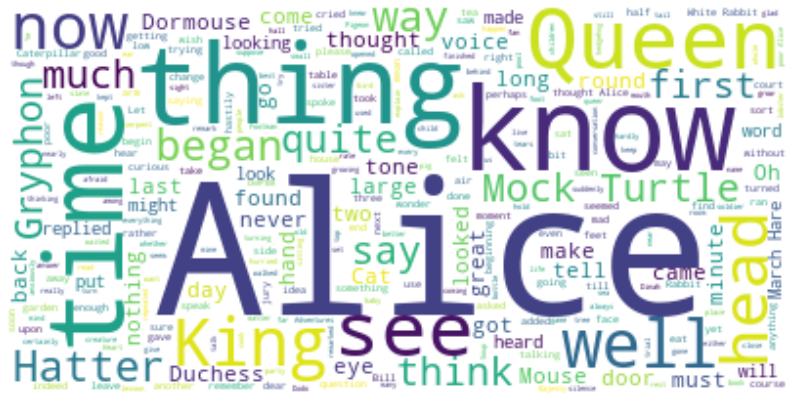

In [24]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
alice_mask = np.array(Image.open('alice_mask.png'))

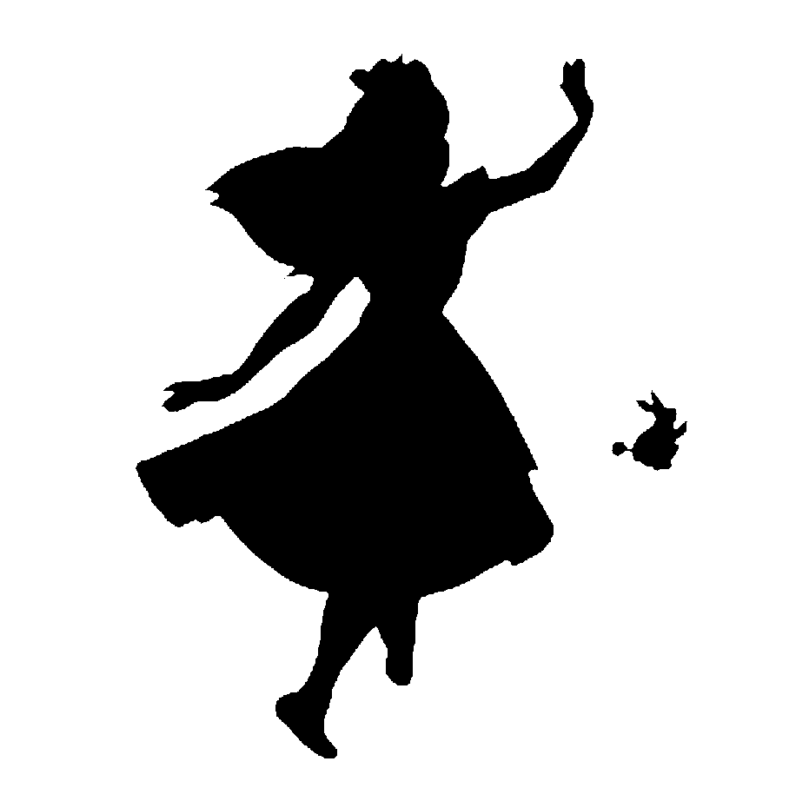

In [26]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

In [28]:
alice_wc.generate(alice_novel)

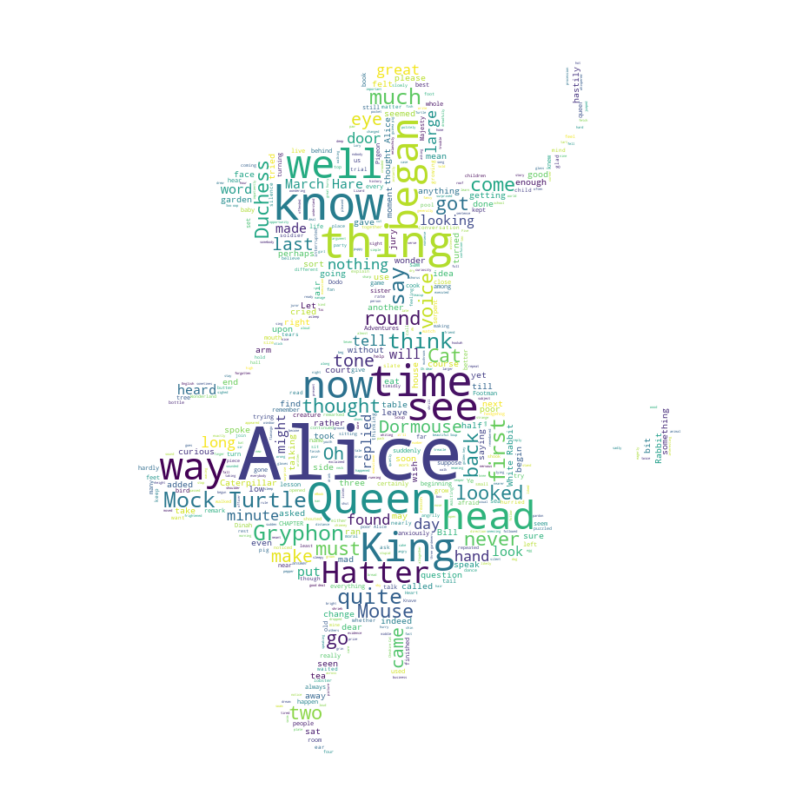

In [29]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [31]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [32]:
max_words = 90
word_string = ""

for country in df_can.index.values:
    if len(country.split(" ")) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ')) + ((country + " ") * repeat_num_times)
        
word_string

'Afghanistan Albania Algeria Andorra Angola Argentina Armenia Australia Austria Azerbaijan Bahamas Bahrain Bangladesh Barbados Belarus Belgium Belize Benin Bhutan Botswana Brazil Bulgaria Burundi Cambodia Cameroon Canada Chad Chile China China China China China China China China China China Colombia Colombia Comoros Congo Croatia Cuba Cyprus Denmark Djibouti Dominica Ecuador Egypt Egypt Eritrea Estonia Ethiopia Fiji Finland France France Gabon Gambia Georgia Germany Ghana Greece Grenada Guatemala Guinea Guinea-Bissau Guyana Guyana Haiti Haiti Honduras Hungary Iceland India India India India India India India India India India Indonesia Iraq Ireland Israel Italy Jamaica Jamaica Japan Jordan Kazakhstan Kenya Kiribati Kuwait Kyrgyzstan Latvia Lebanon Lebanon Lesotho Liberia Libya Liechtenstein Lithuania Luxembourg Madagascar Malawi Malaysia Maldives Mali Malta Mauritania Mauritius Mexico Monaco Mongolia Montenegro Morocco Morocco Mozambique Myanmar Namibia Nauru Nepal Netherlands Nicaragu

In [33]:
wordcloud = WordCloud(background_color="grey").generate(word_string)

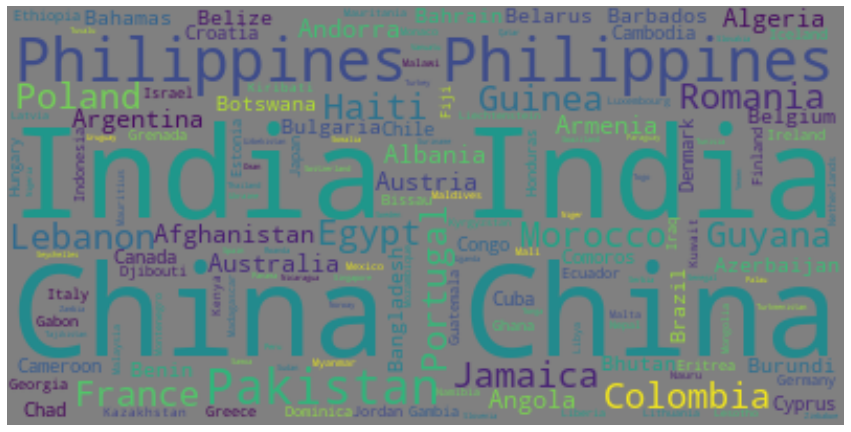

In [34]:
plt.figure(figsize=(15,10))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [35]:
import seaborn as sns

In [37]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... done

# All requested packages already installed.



In [39]:
import folium

In [40]:
world_map = folium.Map()
world_map

In [41]:
df_incidents = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [42]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [43]:
df_incidents.shape

(150500, 13)

In [48]:
sample_incidents = df_incidents.sample(n=100, random_state=111)
sample_incidents

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
136036,166300900,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Saturday,12/17/2016 12:00:00 AM,13:00,PARK,NONE,2600 Block of GEARY BL,-122.446613,37.782246,"(37.7822458223917, -122.446612978839)",16630090006244
81420,160800867,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,10/02/2016 12:00:00 AM,12:30,RICHMOND,NONE,34TH AV / CLEMENT ST,-122.494521,37.781575,"(37.7815746718896, -122.494521109472)",16080086706244
39141,160119373,ASSAULT,INFLICT INJURY ON COHABITEE,Tuesday,02/09/2016 12:00:00 AM,16:57,INGLESIDE,"ARREST, BOOKED",0 Block of STONEYFORD AV,-122.421081,37.730284,"(37.7302836940584, -122.421080787461)",16011937315040
119621,160482277,LARCENY/THEFT,GRAND THEFT FROM PERSON,Tuesday,06/14/2016 12:00:00 AM,07:05,SOUTHERN,NONE,500 Block of BRANNAN ST,-122.397713,37.777470,"(37.7774696662398, -122.397713226445)",16048227706153
113530,166027364,OTHER OFFENSES,OBSCENE PHONE CALLS(S),Tuesday,01/19/2016 12:00:00 AM,13:37,PARK,NONE,1800 Block of MCALLISTER ST,-122.442526,37.777321,"(37.7773210998476, -122.4425263249)",16602736419050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13663,160362607,BURGLARY,"BURGLARY OF RESIDENCE, FORCIBLE ENTRY",Sunday,05/01/2016 12:00:00 AM,21:00,INGLESIDE,NONE,1700 Block of SANCHEZ ST,-122.428891,37.741016,"(37.7410156428706, -122.428891058718)",16036260705041
30136,160212911,BURGLARY,"BURGLARY OF APARTMENT HOUSE, UNLAWFUL ENTRY",Friday,03/04/2016 12:00:00 AM,05:30,NORTHERN,NONE,300 Block of IVY ST,-122.423922,37.777297,"(37.7772967916287, -122.423922154334)",16021291105013
35820,160209350,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",Saturday,03/12/2016 12:00:00 AM,00:25,RICHMOND,"ARREST, BOOKED",3100 Block of WASHINGTON ST,-122.445144,37.790275,"(37.7902748088243, -122.445143689223)",16020935004138
142523,160647415,DRUG/NARCOTIC,SALE OF METH-AMPHETAMINE,Thursday,08/11/2016 12:00:00 AM,12:17,TENDERLOIN,"ARREST, BOOKED",EDDY ST / LEAVENWORTH ST,-122.414243,37.783724,"(37.7837240254478, -122.414242955907)",16064741516654


In [49]:
latitude = 37.77
longitude = -122.42

sf_map = folium.Map(location=(latitude, longitude), zoom_start=12)

In [50]:
sf_map

In [53]:
# nambah fitur grup

incidents = folium.map.FeatureGroup()
for lat, lng in zip(sample_incidents.Y, sample_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
        color="yellow",
        fill=True,
        fill_color="blue",
        fill_opacity=0.7
        )
    )
    
sf_map.add_child(incidents)

In [56]:
# nambah fitur grup

incidents = folium.map.FeatureGroup()
for lat, lng in zip(sample_incidents.Y, sample_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
        color="yellow",
        fill=True,
        fill_color="blue",
        fill_opacity=0.7
        )
    )
    
for lat, lng, label in zip(sample_incidents.Y, sample_incidents.X, sample_incidents.Category):
    folium.Marker((lat, lng), popup=label).add_to(sf_map)
    
sf_map.add_child(incidents)

In [58]:
sf_map = folium.Map(location=(latitude, longitude), zoom_start=12)
incidents = plugins.MarkerCluster().add_to(sf_map)

for lat, lng, label in zip(sample_incidents.Y, sample_incidents.X, sample_incidents.Category):
    folium.Marker(
        (lat, lng),
        popup=label,
        icon=None,
    ).add_to(incidents)
    
sf_map

NameError: name 'plugins' is not defined